<a href="https://colab.research.google.com/github/RainiBenaiah/Sentiment-Analysis-Group_10/blob/main/deep_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Uninstall and reinstall numpy
!pip uninstall -y numpy
!pip install numpy==1.24.4

# Step 2: Install gensim after numpy is fixed
!pip install gensim

Found existing installation: numpy 2.3.0
Uninstalling numpy-2.3.0:
  Successfully uninstalled numpy-2.3.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 71.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.0 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompatible.
xarray-einstats 0.9.0 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompat

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datasets import load_dataset
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cubl

In [ ]:
# Load dataset
from datasets import load_dataset
dataset = load_dataset("amazon_polarity")

# Check format
dataset['train'][0], dataset['test'][0]

# Convert to pandas
import pandas as pd
df = pd.DataFrame(dataset['train']).sample(n=10000, random_state=42)  # Use 10,000 reviews
print(df['label'].value_counts())


label
1    5046
0    4954
Name: count, dtype: int64


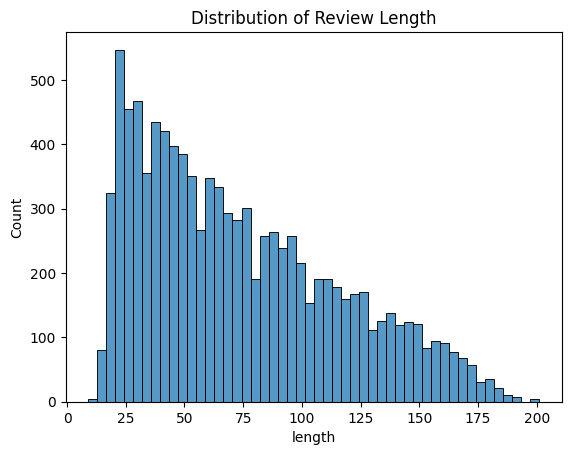

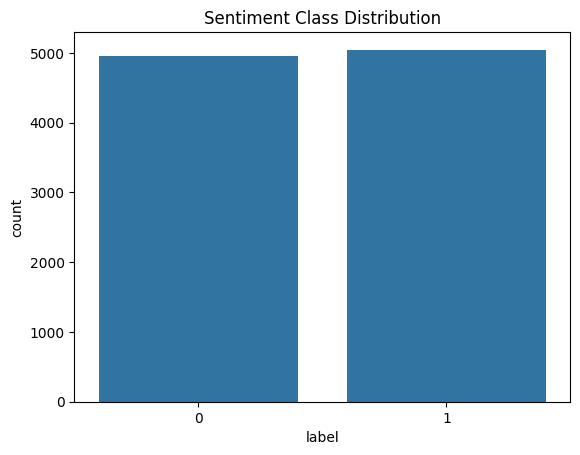

<ipython-input-20-4046199aa1ac>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='magma')


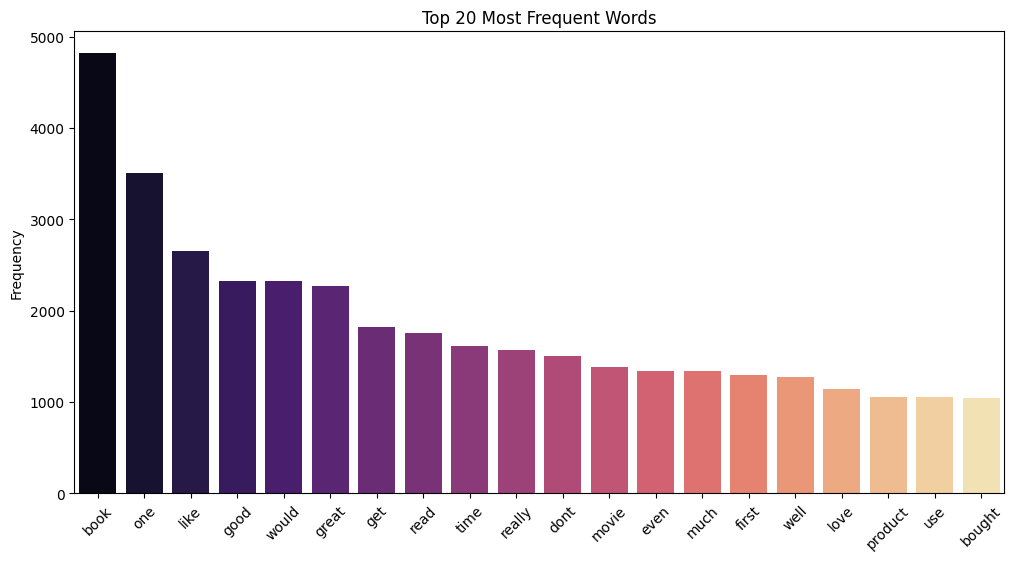

Accuracy: 0.544
F1 Score: 0.7046632124352331
Precision: 0.544
Cross-Entropy Loss: 0.6924054302390987


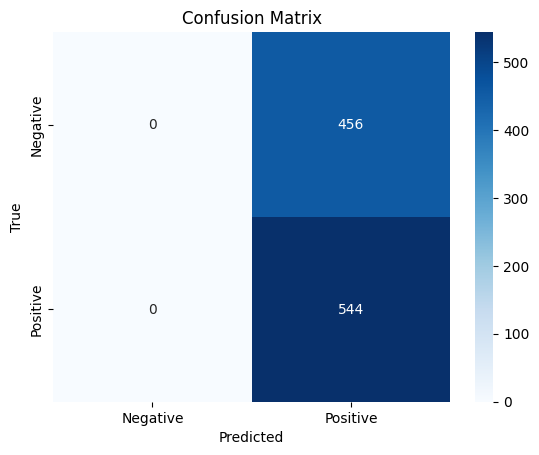

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Length of reviews
df['length'] = df['content'].apply(lambda x: len(x.split()))
sns.histplot(df['length'], bins=50)
plt.title("Distribution of Review Length")
plt.show()

# Class distribution
sns.countplot(x='label', data=df)
plt.title("Sentiment Class Distribution")
plt.show()
# Top 20 Most Frequent Words After Cleaning
from collections import Counter
import itertools

tokenized = df['tokens']  # Assumes this column exists with tokenized reviews
all_words = list(itertools.chain.from_iterable(tokenized))
word_freq = Counter(all_words).most_common(20)

words, freqs = zip(*word_freq)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(freqs), palette='magma')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

# Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, log_loss
import seaborn as sns
import torch # Import torch
import numpy as np # Import numpy

# Assuming you have a trained model and validation loader
# You can obtain y_true, y_pred, and y_proba from the validation set
model.eval() # Set the model to evaluation mode
y_true = []
y_pred = []
y_proba = []

with torch.no_grad():
    for x, y in val_loader: # Use your validation data loader
        x, y = x.to(device), y.to(device)
        output = model(x)
        y_true.extend(y.tolist())
        y_pred.extend(output.argmax(dim=1).tolist())
        y_proba.extend(torch.softmax(output, dim=1)[:, 1].tolist()) # Get probability for the positive class

# Convert lists to numpy arrays for sklearn functions
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_proba = np.array(y_proba)

print("Accuracy:", accuracy_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
# Check if y_true contains only two classes before calculating log loss
if len(np.unique(y_true)) == 2:
    print("Cross-Entropy Loss:", log_loss(y_true, y_proba))
else:
    print("Cannot calculate Cross-Entropy Loss for more than two classes.")


# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip uninstall -y nltk
!pip install nltk --upgrade

Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.1 MB/s eta 0:00:00


In [ ]:
import nltk
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Add this line
from nltk.tokenize import word_tokenize

text = "This is a test sentence!"
tokens = word_tokenize(text)
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['This', 'is', 'a', 'test', 'sentence', '!']


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special chars
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    return tokens

df['tokens'] = df['content'].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from gensim.models import Word2Vec
model_w2v = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=5, workers=4)
word_vectors = model_w2v.wv


In [ ]:
from datasets import load_dataset
MAX_LEN = 200

class AmazonDataset(Dataset):
    def __init__(self, texts, labels, word_vectors):
        self.texts = texts
        self.labels = labels
        self.word_vectors = word_vectors
        self.vector_size = word_vectors.vector_size

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        tokens = self.texts[idx][:MAX_LEN]
        vectors = np.zeros((MAX_LEN, self.vector_size))
        for i, word in enumerate(tokens):
            if word in self.word_vectors:
                vectors[i] = self.word_vectors[word]
        return torch.tensor(vectors, dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.long)

# Split data
train_texts = df['tokens'][:5000]
train_labels = df['label'][:5000]
val_texts = df['tokens'][5000:6000]
val_labels = df['label'][5000:6000]

train_dataset = AmazonDataset(train_texts.tolist(), train_labels.tolist(), word_vectors)
val_dataset = AmazonDataset(val_texts.tolist(), val_labels.tolist(), word_vectors)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


In [ ]:
import torch.nn as nn
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout=0.5):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        out = self.dropout(h_n[-1])
        return self.fc(out)

model = LSTMClassifier(input_dim=100, hidden_dim=128, output_dim=2)


In [ ]:
!pip install scikit-learn


In [ ]:
import numpy as np
import torch.optim as optim
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train(model, loader):
    model.train()
    total_loss = 0
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            output = model(x)
            pred = output.argmax(dim=1)
            correct += (pred == y).sum().item()
            total += y.size(0)
    return correct / total

# Run training loop
for epoch in range(5):
    loss = train(model, train_loader)
    acc = evaluate(model, val_loader)
    print(f"Epoch {epoch+1}: Loss={loss:.4f}, Val Acc={acc:.4f}")


Epoch 1: Loss=0.6934, Val Acc=0.4560
Epoch 2: Loss=0.6936, Val Acc=0.4560
Epoch 3: Loss=0.6935, Val Acc=0.4560
Epoch 4: Loss=0.6931, Val Acc=0.5440
Epoch 5: Loss=0.6936, Val Acc=0.5440


In [35]:
import torch
import pandas as pd
import torch.nn.functional as F
import numpy as np # Ensure numpy is imported

# Define the clean_text function again or make sure it's available in the scope
# (assuming it was defined and executed earlier)
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
# Make sure necessary NLTK resources are downloaded
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('punkt')
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special chars
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    return tokens

# Modify the predict_reviews function to use the cleaning function
# and Word2Vec embeddings, adapted for the LSTM model's input
def predict_reviews(model, reviews, word_vectors, max_len=200): # max_len should match the Dataset
    model.eval() # Set the model to evaluation mode
    results = []
    vector_size = word_vectors.vector_size

    for review in reviews:
        # Apply the same cleaning and tokenization as used for training
        tokens = clean_text(review)[:max_len]

        # Convert tokens to Word2Vec embeddings
        vectors = np.zeros((max_len, vector_size))
        for i, word in enumerate(tokens):
            if word in word_vectors:
                vectors[i] = word_vectors[word]

        # Convert the numpy array to a PyTorch tensor and add a batch dimension
        input_tensor = torch.tensor(vectors, dtype=torch.float32).unsqueeze(0).to(device) # Add batch dimension and move to device

        with torch.no_grad():
            output = model(input_tensor) # Pass the tensor to the model
            probs = F.softmax(output, dim=1).cpu().numpy()[0]

        pred_idx = probs.argmax()
        confidence = probs[pred_idx]
        label = "POSITIVE" if pred_idx == 1 else "NEGATIVE" # Assuming 1 is positive and 0 is negative

        results.append({
            "review": review,
            "prediction": label,
            "confidence": round(confidence, 6),
            "prob_negative": round(probs[0], 6),
            "prob_positive": round(probs[1], 6)
        })

    return pd.DataFrame(results)

In [36]:
# Define sample reviews
sample_reviews = [
    "This product is amazing and works perfectly. Highly recommended!",
    "Terrible experience, the item broke after one use. Very disappointed.",
    "It's okay, not great, but not bad either. Average product.",
    "The best purchase I've made this year, exceeded expectations.",
    "Absolutely awful, a complete waste of money. I want a refund."
]

# Call the predict_reviews function with the model and word_vectors
# model is the trained LSTM model
# word_vectors is model_w2v.wv which contains the trained word embeddings
df_results = predict_reviews(model, sample_reviews, word_vectors)

print(df_results)

                                              review prediction  confidence  \
0  This product is amazing and works perfectly. H...   POSITIVE    0.512658   
1  Terrible experience, the item broke after one ...   POSITIVE    0.512658   
2  It's okay, not great, but not bad either. Aver...   POSITIVE    0.512658   
3  The best purchase I've made this year, exceede...   POSITIVE    0.512658   
4  Absolutely awful, a complete waste of money. I...   POSITIVE    0.512658   

   prob_negative  prob_positive  
0       0.487342       0.512658  
1       0.487342       0.512658  
2       0.487342       0.512658  
3       0.487342       0.512658  
4       0.487342       0.512658  
